In [1]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import os
os.chdir("../src")
from build_network_object import build_network_object
from draw_network_by_classification import draw_network_by_classification, compare_degrees_strength
from draw_adjacency_matrix import draw_adjacency_matrix, draw_adjacency_matrix_nolabel
from draw_and_print_communities import draw_and_print_communities, compare_comunity_intersection
from correlations import correlation_industry_pairs, correlation_network_degree,correlation_adjacency_matrix
import seaborn as sns

# Results of the Flows and Connection algorithms for 1997-2008 matrices 


This notebook creates figures and tables used in the report.

## Flows


In [2]:
label1 = "Table1_Reduced_matrix_1997_2008_flows"
reduced_matrix_1997_2008 = pd.read_csv("../data/"+label1+".csv", index_col=0)

reduced_matrix_1997_2008_flows = reduced_matrix_1997_2008[reduced_matrix_1997_2008['StartIndst']!=0]

sub_matrix_1997_2008_less1 = reduced_matrix_1997_2008_flows[reduced_matrix_1997_2008_flows['weight']<1].sort_values(by=['weight'], ascending=False)
sub_matrix_1997_2008_flows = sub_matrix_1997_2008_less1[sub_matrix_1997_2008_less1['weight']>0].sort_values(by=['weight'], ascending=False)

print ("Number of links:", sub_matrix_1997_2008_flows.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_1997_2008_flows['StartIndst'].values,sub_matrix_1997_2008_flows['FinalIndst'].values])))
sub_matrix_1997_2008_flows[1:50]

Number of links: 2292
Number of 4-digit industries observed:
367


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
4820,5161,5181,0.999590,NaN,Wholesale of machine tools,NaN,NaN,NaN,NaN,32.0
4822,4021,4022,0.999557,Manufacture of gas,Distribution and trade of gaseous fuels throug...,NaN,NaN,NaN,NaN,27.0
4787,5162,5182,0.999342,NaN,"Wholesale of mining, construction and civil en...",NaN,NaN,NaN,NaN,42.0
4681,5271,5274,0.999221,"Repair of boots, shoes and other articles of l...",Repair n.e.c.,NaN,NaN,NaN,NaN,12.0
4711,5274,5271,0.999142,Repair n.e.c.,"Repair of boots, shoes and other articles of l...",NaN,NaN,NaN,NaN,10.0
4596,4022,4021,0.999139,Distribution and trade of gaseous fuels throug...,Manufacture of gas,NaN,NaN,NaN,NaN,10.0
4634,5182,5162,0.998928,"Wholesale of mining, construction and civil en...",NaN,NaN,NaN,NaN,NaN,10.0
4678,4011,4012,0.998864,Production of electricity,Transmission of electricity,NaN,NaN,NaN,NaN,54.0
4784,5166,5188,0.998777,NaN,Wholesale of agricultural machinery and access...,NaN,NaN,NaN,NaN,72.0
4734,7483,7485,0.998493,NaN,Secretarial and translation activities,NaN,NaN,NaN,NaN,49.0


In [3]:
# links without cuts
print ("Number of links:", reduced_matrix_1997_2008.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([reduced_matrix_1997_2008['StartIndst'].values,reduced_matrix_1997_2008['FinalIndst'].values])))


Number of links: 4828
Number of 4-digit industries observed:
488


## Top flows sorted by counts values

In [4]:
sub_matrix_1997_2008_flows[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['Counts'], ascending=False)[0:10]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
5,7511,8010,General (overall) public service activities,Primary education,3304.0,0.276996
15,8021,8010,General secondary education,Primary education,2262.0,0.510068
1725,8511,8514,"Public sector hospital activities, including N...",Other human health activities,1893.0,0.687580
175,8514,8511,Other human health activities,"Public sector hospital activities, including N...",1561.0,0.652672
9,8532,8010,Charitable social work activities without acco...,Primary education,1412.0,0.205057
1603,5211,7415,"Retail sale by confectioners, tobacconists and...",Management activities of other non-financial h...,1358.0,0.638713
939,8010,8021,Primary education,General secondary education,1255.0,0.390316
2968,7220,7222,NaN,Other software consultancy and supply,1094.0,0.957098
678,8010,8532,Primary education,Charitable social work activities without acco...,951.0,0.078609
156,8531,8511,Charitable social work activities with accommo...,"Public sector hospital activities, including N...",891.0,0.229692


## Top flows sorted by weight values

In [5]:
sub_matrix_1997_2008_flows[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['weight'], ascending=False)[0:30]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
4603,5181,5161,Wholesale of machine tools,NaN,10.0,0.999680
4820,5161,5181,NaN,Wholesale of machine tools,32.0,0.999590
4822,4021,4022,Manufacture of gas,Distribution and trade of gaseous fuels throug...,27.0,0.999557
4787,5162,5182,NaN,"Wholesale of mining, construction and civil en...",42.0,0.999342
4681,5271,5274,"Repair of boots, shoes and other articles of l...",Repair n.e.c.,12.0,0.999221
4711,5274,5271,Repair n.e.c.,"Repair of boots, shoes and other articles of l...",10.0,0.999142
4596,4022,4021,Distribution and trade of gaseous fuels throug...,Manufacture of gas,10.0,0.999139
4634,5182,5162,"Wholesale of mining, construction and civil en...",NaN,10.0,0.998928
4678,4011,4012,Production of electricity,Transmission of electricity,54.0,0.998864
4784,5166,5188,NaN,Wholesale of agricultural machinery and access...,72.0,0.998777


## Connections


In [6]:
label2 = "Table2_Reduced_matrix_1997_2008_connections"
reduced_matrix_1997_2008_conn = pd.read_csv("../data/"+label2+".csv", index_col=0)

reduced_matrix_1997_2008_conn = reduced_matrix_1997_2008_conn[reduced_matrix_1997_2008_conn['StartIndst']!=0]

sub_matrix_1997_2008_conn_less1 = reduced_matrix_1997_2008_conn[reduced_matrix_1997_2008_conn['weight']<1]
sub_matrix_1997_2008_conn = sub_matrix_1997_2008_conn_less1[sub_matrix_1997_2008_conn_less1['weight']>0]

print ("Number of links:", sub_matrix_1997_2008_conn.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_1997_2008_conn['StartIndst'].values,sub_matrix_1997_2008_conn['FinalIndst'].values])))

sub_matrix_1997_2008_conn.sort_values(by=['weight'], ascending=False)[1:50]



Number of links: 3978
Number of 4-digit industries observed:
429


,StartIndst,FinalIndst,weight,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Counts
6813,501,502,0.999752,NaN,NaN,NaN,NaN,NaN,NaN,17.0
6800,5274,5271,0.999636,Repair n.e.c.,"Repair of boots, shoes and other articles of l...",NaN,NaN,NaN,NaN,10.0
6747,5271,5274,0.999636,"Repair of boots, shoes and other articles of l...",Repair n.e.c.,NaN,NaN,NaN,NaN,15.0
6937,5161,5181,0.999543,NaN,Wholesale of machine tools,NaN,NaN,NaN,NaN,41.0
6648,5181,5161,0.999543,Wholesale of machine tools,NaN,NaN,NaN,NaN,NaN,10.0
6802,1721,1723,0.999432,Cotton-type weaving,Worsted-type weaving,NaN,NaN,NaN,NaN,14.0
6722,1723,1721,0.999432,Worsted-type weaving,Cotton-type weaving,NaN,NaN,NaN,NaN,10.0
6299,2111,2122,0.999332,Manufacture of pulp,Manufacture of household and sanitary goods an...,NaN,NaN,NaN,NaN,13.0
6923,2122,2111,0.999332,Manufacture of household and sanitary goods an...,Manufacture of pulp,NaN,NaN,NaN,NaN,10.0
6849,5162,5182,0.999301,NaN,"Wholesale of mining, construction and civil en...",NaN,NaN,NaN,NaN,47.0


In [7]:

# links without cuts
print ("Number of links:", reduced_matrix_1997_2008_conn.shape[0])
print ("Number of 4-digit industries observed:")
print (len(np.unique([reduced_matrix_1997_2008_conn['StartIndst'].values,reduced_matrix_1997_2008_conn['FinalIndst'].values])))


Number of links: 6947
Number of 4-digit industries observed:
497


## Top connections sorted by counts

In [41]:
sub_matrix_1997_2008_conn[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts']].sort_values(by=['Counts'], ascending=False)[0:20]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts
5,7511,8010,General (overall) public service activities,Primary education,5452.0
15,8021,8010,General secondary education,Primary education,3969.0
2092,8511,8514,"Public sector hospital activities, including N...",Other human health activities,3028.0
214,8514,8511,Other human health activities,"Public sector hospital activities, including N...",2572.0
9,8532,8010,Charitable social work activities without acco...,Primary education,2466.0
558,8010,7511,Primary education,General (overall) public service activities,2303.0
1241,8010,8021,Primary education,General secondary education,1917.0
2134,5211,7415,"Retail sale by confectioners, tobacconists and...",Management activities of other non-financial h...,1627.0
1945,5211,5242,"Retail sale by confectioners, tobacconists and...",Retail sale of adults' fur and leather clothin...,1564.0
325,7415,5211,Management activities of other non-financial h...,"Retail sale by confectioners, tobacconists and...",1429.0


## Top connections sorted by weights

In [43]:
sub_matrix_1997_2008_conn[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_FinalIndst','Counts','weight']].sort_values(by=['weight'], ascending=False)[0:40]

,StartIndst,FinalIndst,SubActivity_StartIndst,SubActivity_FinalIndst,Counts,weight
6876,502,501,NaN,NaN,10.0,0.999752
6813,501,502,NaN,NaN,17.0,0.999752
6800,5274,5271,Repair n.e.c.,"Repair of boots, shoes and other articles of l...",10.0,0.999636
6747,5271,5274,"Repair of boots, shoes and other articles of l...",Repair n.e.c.,15.0,0.999636
6937,5161,5181,NaN,Wholesale of machine tools,41.0,0.999543
6648,5181,5161,Wholesale of machine tools,NaN,10.0,0.999543
6802,1721,1723,Cotton-type weaving,Worsted-type weaving,14.0,0.999432
6722,1723,1721,Worsted-type weaving,Cotton-type weaving,10.0,0.999432
6299,2111,2122,Manufacture of pulp,Manufacture of household and sanitary goods an...,13.0,0.999332
6923,2122,2111,Manufacture of household and sanitary goods an...,Manufacture of pulp,10.0,0.999332


## Correlations

/Users/crangelsmith/PycharmProjects/KnowledgeFlows/python/labour_flows_matrix/src/correlations.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_industry1['id'] = df_industry1.groupby(['StartIndst', 'FinalIndst']).ngroup()
/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


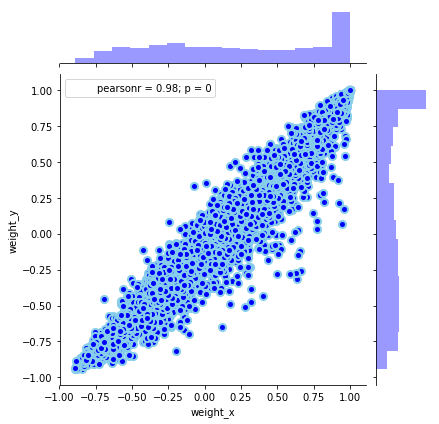

/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


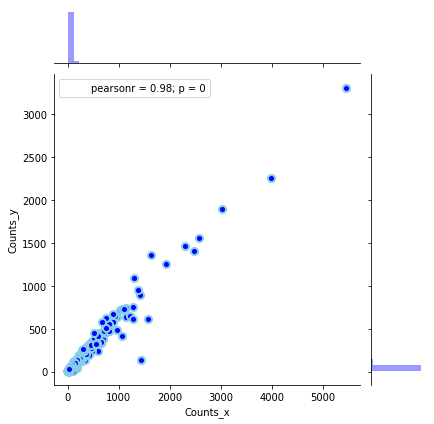

In [10]:
correlation_industry_pairs(sub_matrix_1997_2008_conn_less1,sub_matrix_1997_2008_less1)


correlation_industry_pairs(sub_matrix_1997_2008_conn_less1,sub_matrix_1997_2008_less1,'counts')


In [11]:
## Distrubiot

No handles with labels found to put in legend.


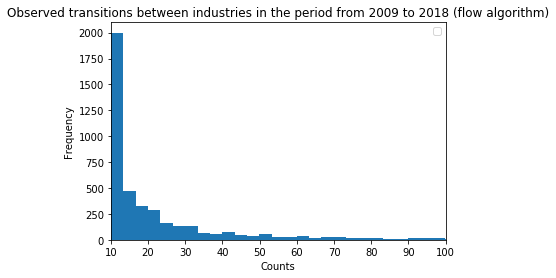

0.813594470046083

In [12]:
plt.hist(sub_matrix_1997_2008_less1['Counts'],bins=990)

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Observed transitions between industries in the period from 2009 to 2018 (flow algorithm)')
plt.xlim(10, 100)
plt.legend()
plt.show()


sub_matrix_1997_2008_less1[sub_matrix_1997_2008_less1['Counts']<35].shape[0]/sub_matrix_1997_2008_less1.shape[0]

In [13]:
Gm_simple_1997_2008_flows = build_network_object(reduced_matrix_1997_2008_flows,'weight')
Gm_simple_1997_2008_conn = build_network_object(reduced_matrix_1997_2008_conn,'weight')

## Degree comparison:

NETWORK OF flows


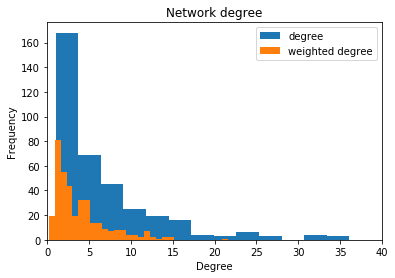

mean degree 6.746594005449591
mean strenght 3.7859163346274283


NETWORK OF connections


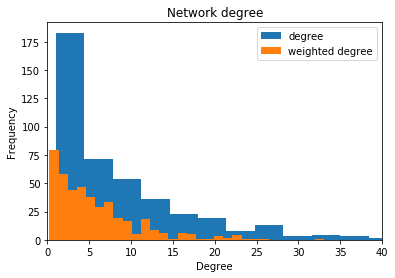

mean degree 9.272727272727273
mean strenght 5.7022668743343


In [14]:
print ('NETWORK OF flows')
compare_degrees_strength(Gm_simple_1997_2008_flows)
print()
print()
print ('NETWORK OF connections')
compare_degrees_strength(Gm_simple_1997_2008_conn)

In [35]:
nodes_1digit = pd.read_csv("../data/nodesMetrics/Table1_Reduced_matrix_1997_2008_conns_nodesMetrics_1digitIndustries.csv")

nodes_1digit.head()

,Id,Label,timeset,Size,Weighted Degree,Degree,eigencentrality
0,1,"Agriculture, Forestry, Fishing, Veterinary",NaN,8,19.073059,8,0.406015
1,2,All other Manufacturing,NaN,39,123.625638,13,0.740909
2,3,"Manufacture machinery, vehicle, transport",NaN,16,59.749826,11,0.672444
3,4,"Manufacture computer, electronic, light electr...",NaN,12,27.119739,9,0.597766
4,5,"Manufacture food, drink, tobacco",NaN,20,72.661996,6,0.324843


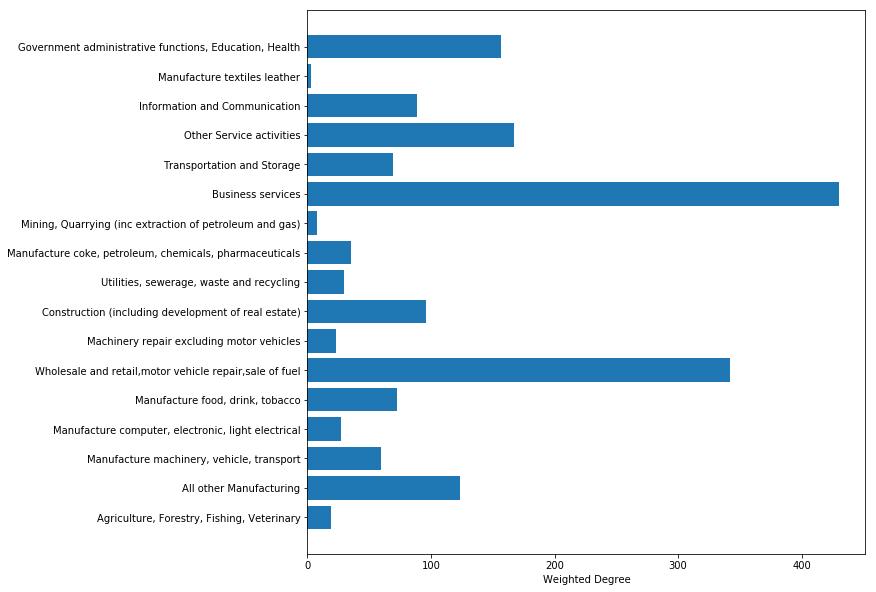

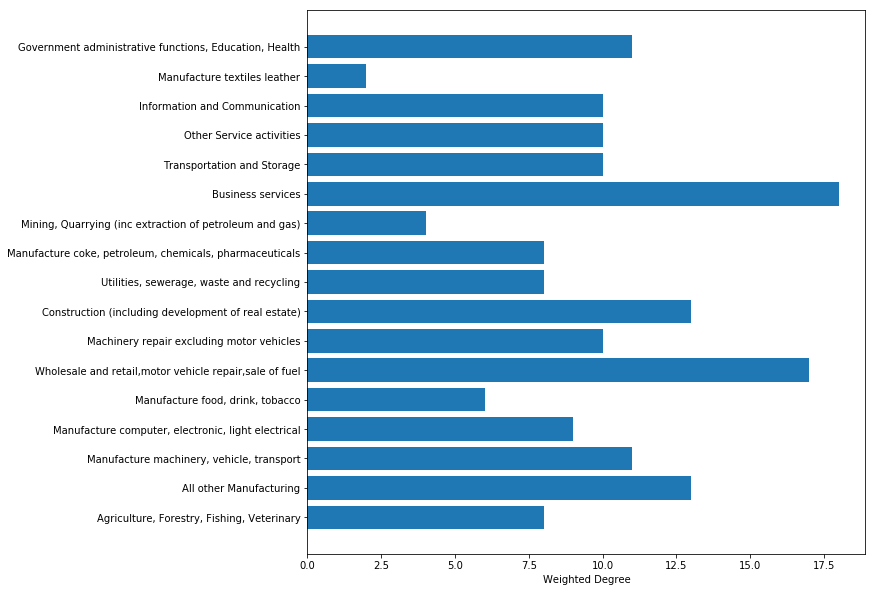

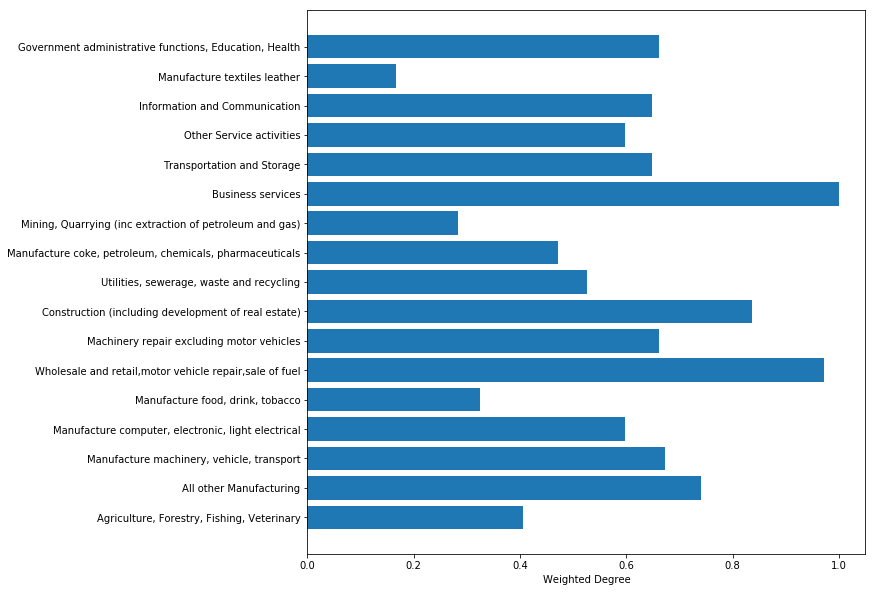

In [38]:

fig, ax = plt.subplots(figsize=(10, 10))

plt.barh(nodes_1digit['Label'], nodes_1digit['Weighted Degree'])
plt.xlabel('Weighted Degree')
plt.show()


fig, ax = plt.subplots(figsize=(10, 10))

plt.barh(nodes_1digit['Label'], nodes_1digit['Degree'])
plt.xlabel('Weighted Degree')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.barh(nodes_1digit['Label'], nodes_1digit['eigencentrality'])
plt.xlabel('Weighted Degree')
plt.show()


## Adjacency matrix:
### Flows:

/anaconda3/envs/kflows/lib/python3.7/site-packages/matplotlib/colorbar.py:600: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


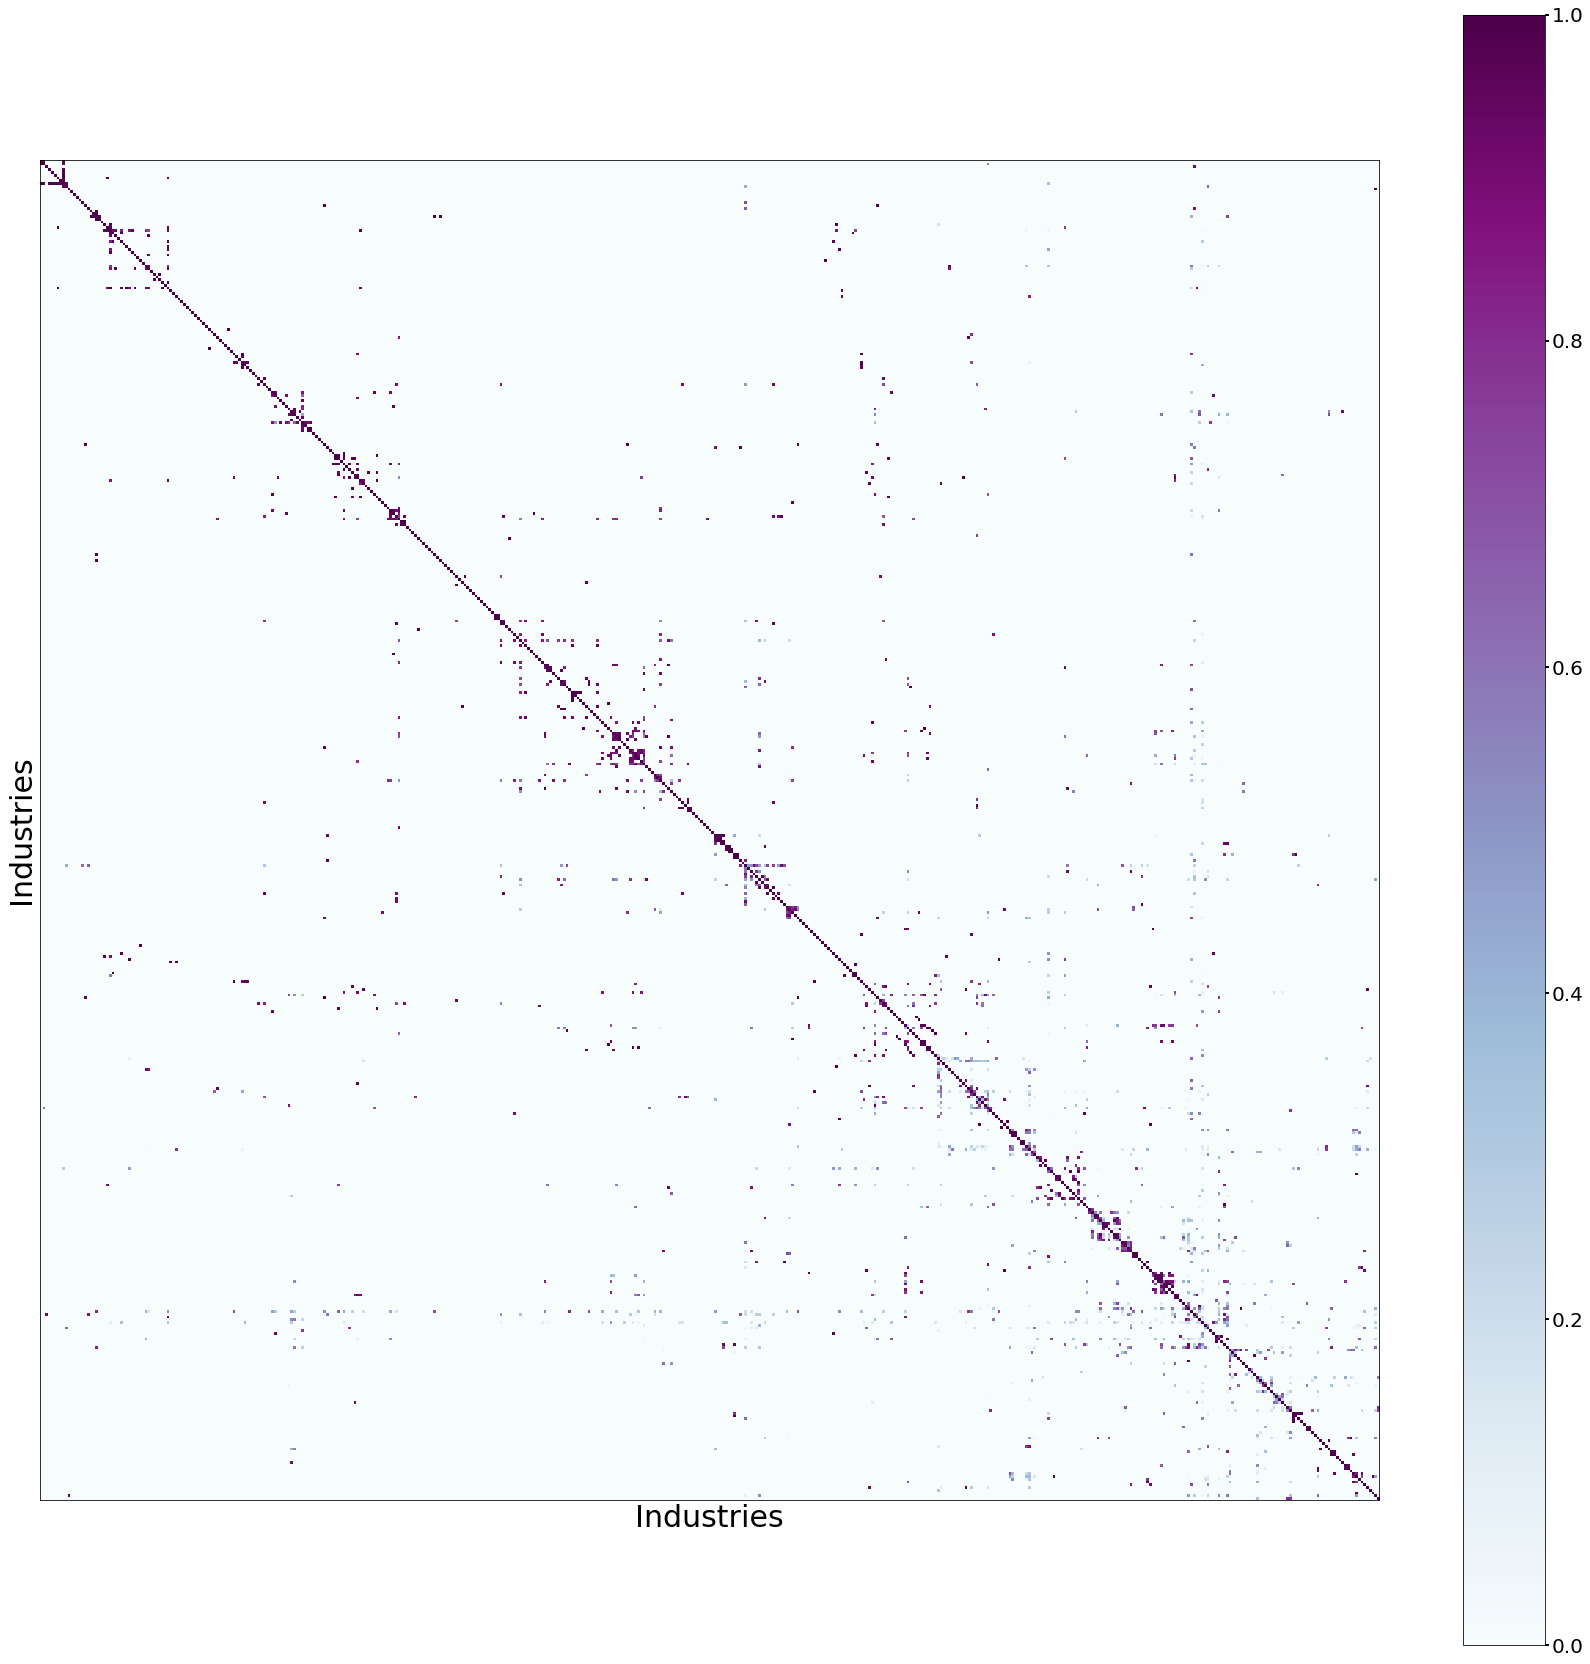

In [15]:
draw_adjacency_matrix_nolabel(reduced_matrix_1997_2008_flows[reduced_matrix_1997_2008_flows['weight']>0],['StartIndst','FinalIndst'],'weight')

### Connections:

/anaconda3/envs/kflows/lib/python3.7/site-packages/matplotlib/colorbar.py:600: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


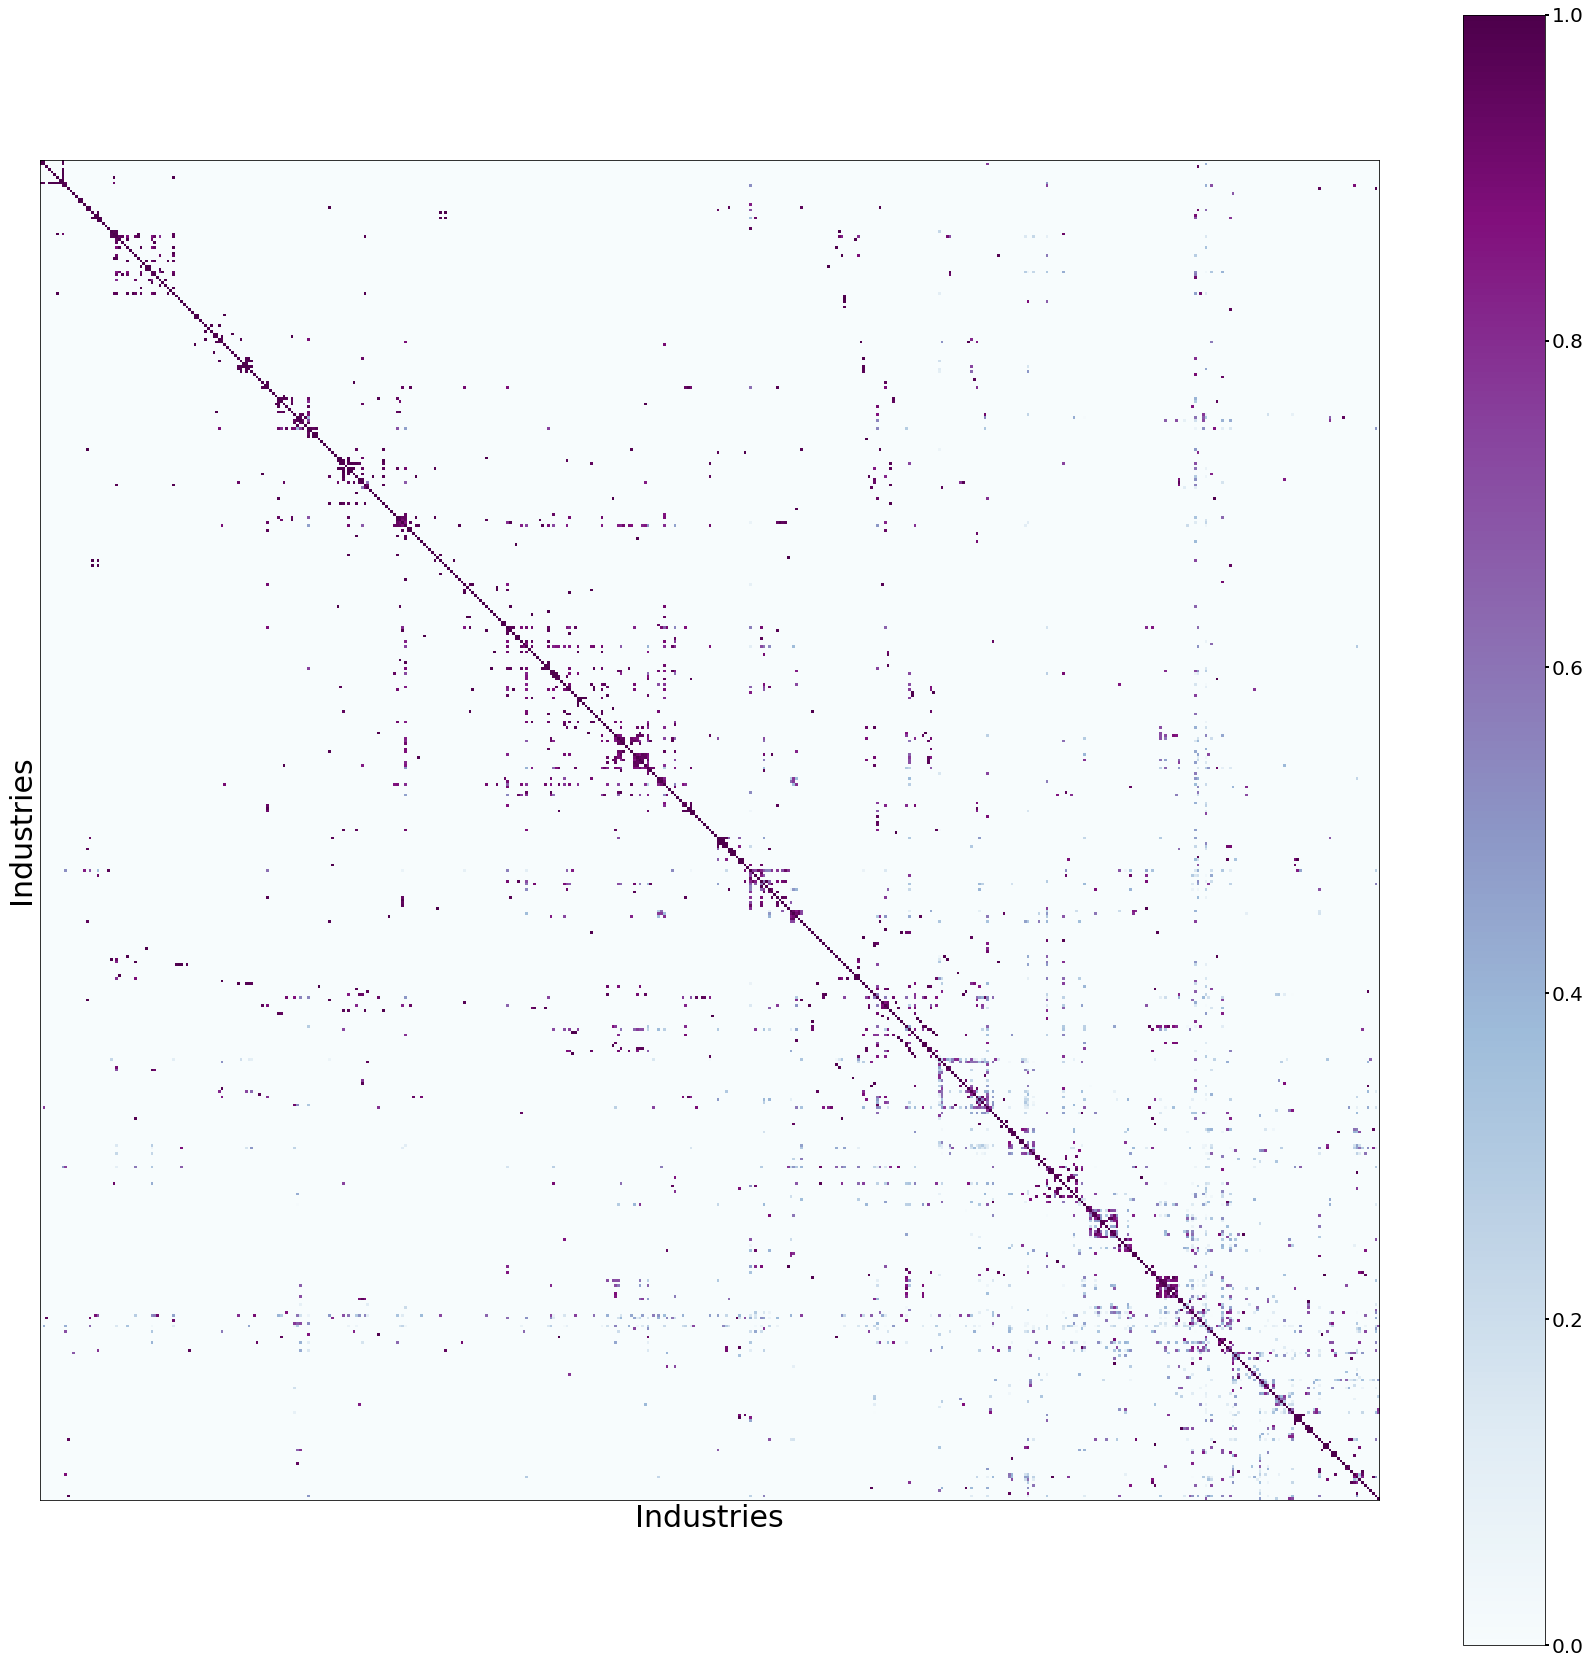

In [16]:
draw_adjacency_matrix_nolabel(reduced_matrix_1997_2008_conn[reduced_matrix_1997_2008_conn['weight']>0],['StartIndst','FinalIndst'],'weight')

/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


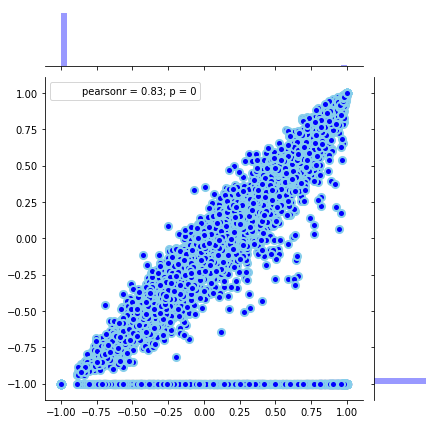

adjacency matrix correlation
(0.8284359021163559, 0.0)
percentage of the entries with non-symetrical missigness
0.8582683222068831
2120
247009
6947
4827


(               x         y
 0       1.000000  1.000000
 1       0.984278  0.973785
 2      -1.000000 -1.000000
 3      -1.000000 -1.000000
 4      -1.000000 -1.000000
 5      -1.000000 -1.000000
 6      -1.000000 -1.000000
 7      -1.000000 -1.000000
 8       0.991278  0.966188
 9      -1.000000 -1.000000
 10     -1.000000 -1.000000
 11     -1.000000 -1.000000
 12     -1.000000 -1.000000
 13     -1.000000 -1.000000
 14     -1.000000 -1.000000
 15     -1.000000 -1.000000
 16     -1.000000 -1.000000
 17     -1.000000 -1.000000
 18     -1.000000 -1.000000
 19     -1.000000 -1.000000
 20     -1.000000 -1.000000
 21     -1.000000 -1.000000
 22     -1.000000 -1.000000
 23     -1.000000 -1.000000
 24     -1.000000 -1.000000
 25     -1.000000 -1.000000
 26     -1.000000 -1.000000
 27     -1.000000 -1.000000
 28     -1.000000 -1.000000
 29     -1.000000 -1.000000
 ...          ...       ...
 246979 -1.000000 -1.000000
 246980 -1.000000 -1.000000
 246981 -1.000000 -1.000000
 246982 -1.000000 -1

In [17]:
correlation_adjacency_matrix(reduced_matrix_1997_2008_conn,reduced_matrix_1997_2008_flows,'weight')